# Data Gather

In [4]:
import numpy as np
import pandas as pd

There are 3 cvs files from Kaggle - Seattle Airbnb Project

In [5]:
cal_df = pd.read_csv('./Data/calendar.csv')

In [6]:
listing_df = pd.read_csv('./Data/listings.csv')

In [7]:
review_df = pd.read_csv('./Data/reviews.csv')

# Data Access

Take a look at what information each csv files contains

In [8]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [9]:
cal_df['listing_id'].nunique()

3818

The calendar file contains pice change over time for 3818 Airbnbs

In [10]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [11]:
listing_df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


There is more information contained in the listing csv, like the details about the Airbnb description, the host, the neighborhood and the review scores, I'll mainly use this file for analysis.

In [12]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


There are detailed review comments in this file.

# Data Clean

I'm interested in the location,prices and review data in the csv. No missing data for location but some missing for cleaning fee. Missing data might not matter too much fore review/rating score data if we take average of them.

I want to impute the missing data in cleaning fee here with average.

In [45]:
pd.set_option('mode.chained_assignment', None)

# change the data type of the price column
listing_df['price'] = listing_df['price'].replace('[\$,]', '', regex=True).astype(float)
listing_df['cleaning_fee'] = listing_df['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float) 

# For some columns, the cleaning fee value is missing, so calculate the average ratio of cleaning fee/price here

listing_df['cleaning_fee_ratio'] = listing_df['cleaning_fee']/listing_df['price']
c = listing_df['cleaning_fee_ratio'] .mean()

# the raio is about 42%, so we are using this to impute the missing value

listing_df.loc[listing_df['cleaning_fee'].isna() == True,'cleaning_fee'] = listing_df['price']*c

# Data Analyze and Visualize

### Question 1: If a couple wants to stay in a entire apartment or house, which neighborhood group would most people pick? (Assuming the number of reviews represents for the number of bookings)

I want to take a look at how many airbnb reviews each neighborhood group has.

In [17]:
list_df = listing_df[(listing_df['accommodates'] ==2)&(listing_df['room_type'] =='Entire home/apt')] 
pop_area = list_df.groupby(['neighbourhood_group_cleansed'])['number_of_reviews'].sum().sort_values(ascending = False)

# I picked neighborhood group because it's easy for tourists to understand seattle neighborhood in a high level

In [18]:
pop_df = pd.DataFrame(pop_area).reset_index().head(10)

In [19]:
pop_df

,neighbourhood_group_cleansed,number_of_reviews
0,Capitol Hill,3345
1,Other neighborhoods,2958
2,Downtown,2356
3,Ballard,1850
4,Queen Anne,1746
5,Central Area,1729
6,Rainier Valley,827
7,West Seattle,644
8,Delridge,589
9,Cascade,549


Visualize the data to make it more clear 

[Text(0, 0, 'Capitol Hill'),
 Text(0, 0, 'Other neighborhoods'),
 Text(0, 0, 'Downtown'),
 Text(0, 0, 'Ballard'),
 Text(0, 0, 'Queen Anne'),
 Text(0, 0, 'Central Area'),
 Text(0, 0, 'Rainier Valley'),
 Text(0, 0, 'West Seattle'),
 Text(0, 0, 'Delridge'),
 Text(0, 0, 'Cascade')]

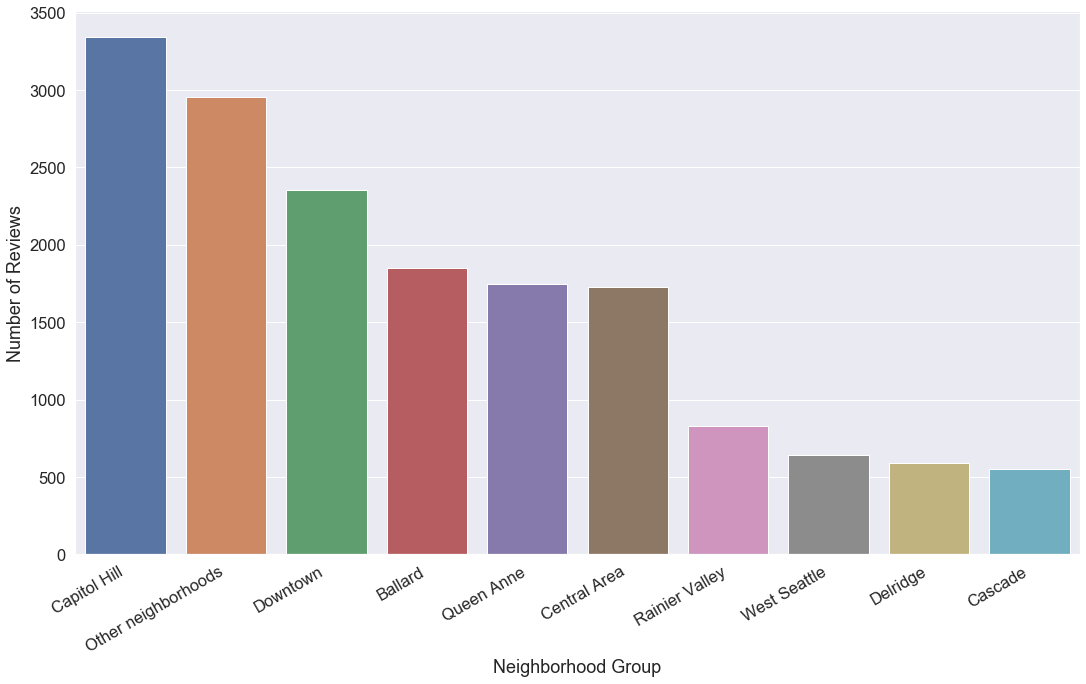

In [43]:
# Making plots with seaborn and matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.5)

pop_plot = sns.barplot(
    data= pop_df,
    x= 'neighbourhood_group_cleansed',
    y= 'number_of_reviews')

pop_plot.figure.set_size_inches(18,10)
pop_plot.set(xlabel='Neighborhood Group', ylabel='Number of Reviews')

pop_plot.set_xticklabels(pop_plot.get_xticklabels(), rotation=30, horizontalalignment='right')

Conclusion:

Top3 popular neighborhood groups would be Capitol Hill, Downtown and Ballard

### Question 2: What should the couple expect about the price range of the airbnbs in the popular neighrborhoods if they wants to stay for a long weekend?

First, we need to do some data transformation and filtering

In [26]:
#filter the available options
list_df2 = list_df1[(list_df1['minimum_nights']<4)&(list_df1['host_acceptance_rate'] == "100%")]

In [27]:
# total price = price * 2 + cleaning fee
list_df2['weekend_total'] = list_df2['price']*3 + list_df2['cleaning_fee']

In [28]:
# summary for the price range
# Here I picked neighbourhood itself instead of neighborhood group because we want to know more about detailed level

weekend_min = list_df2.groupby(['neighbourhood_cleansed'])['weekend_total'].min().rename('Min_price')
weekend_avg = list_df2.groupby(['neighbourhood_cleansed'])['weekend_total'].mean().rename('Mean_price')
weekend_max = list_df2.groupby(['neighbourhood_cleansed'])['weekend_total'].max().rename('Max_price')
Avaliable_options = list_df2.groupby(['neighbourhood_cleansed'])['weekend_total'].count().rename('Availiable_options')

In [29]:
# Take a look at the summary of the price range and availiable options

list_df3 = pd.concat([weekend_min,weekend_avg,weekend_max,Avaliable_options],axis=1)
list_df4 = list_df3.sort_values('Availiable_options',ascending=False).reset_index()

In [30]:
list_df4

,neighbourhood_cleansed,Min_price,Mean_price,Max_price,Availiable_options
0,Broadway,192.000000,352.236386,866.853865,92
1,Belltown,235.000000,428.346392,630.000000,41
2,First Hill,245.000000,417.393249,625.000000,20
3,Stevens,187.000000,373.794307,693.483092,17
4,Adams,247.000000,373.221271,575.000000,15
5,Central Business District,204.577512,442.380215,1040.224638,10
6,Loyal Heights,225.382005,300.160290,414.000000,9
7,West Woodland,260.056160,349.981046,497.000000,7
8,Pioneer Square,230.000000,552.794531,850.000000,7
9,Pike-Market,310.000000,426.342303,620.667368,6


Here we see there are only few options in some neighboorhood, in order to provide visitors more options to choose
Let's filter to the neighboors that at least have 10 airbnb options

In [47]:
filtered_neighbor = list_df4[list_df4['Availiable_options'] >9]['neighbourhood_cleansed']
list_df5 = list_df2[list_df2['neighbourhood_cleansed'].isin(filtered_neighbor)]

We want to boxplot the distribution of the prices for different neighborhoods.

[Text(0, 0, 'Adams'),
 Text(0, 0, 'Belltown'),
 Text(0, 0, 'Central Business District'),
 Text(0, 0, 'First Hill'),
 Text(0, 0, 'Broadway'),
 Text(0, 0, 'Stevens')]

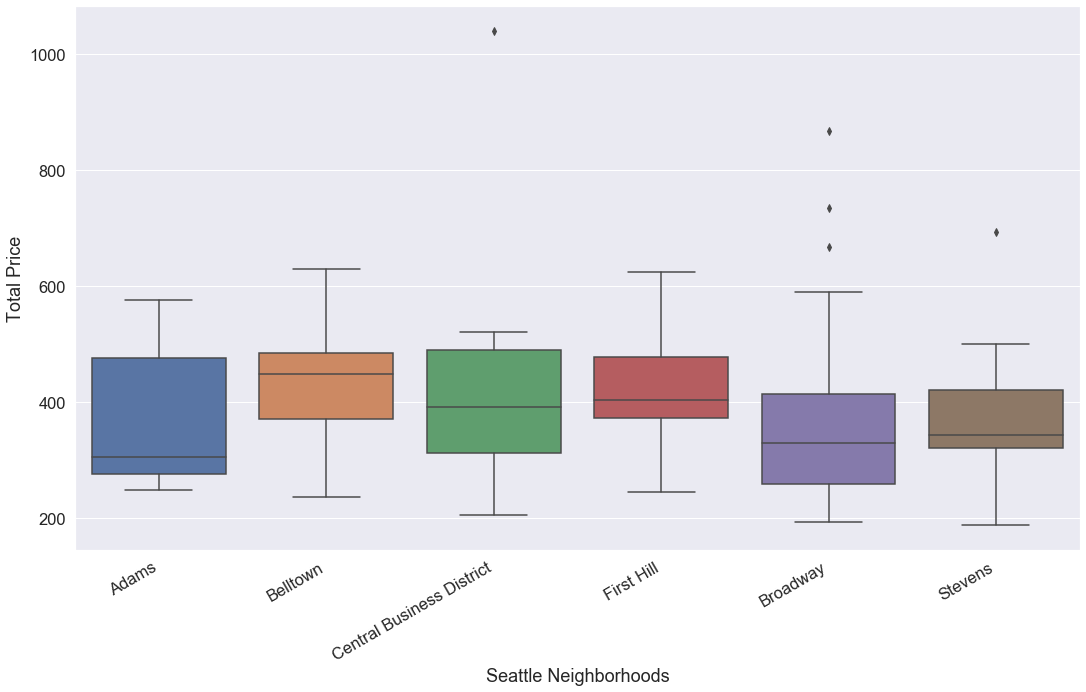

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1.5)

neigh_plt = sns.boxplot(x="neighbourhood_cleansed",
                            y="weekend_total",
                            data=list_df5)

neigh_plt.figure.set_size_inches(18,10)
neigh_plt.set(xlabel='Seattle Neighborhoods', ylabel='Total Price')

neigh_plt.set_xticklabels(neigh_plt.get_xticklabels(), rotation=30, horizontalalignment='right')

Conclusion: 

The couple should expect the price range of staying in the major neighborhoods to be 200 - 600 dollars.

### Question 3: How did the price of the Airbnb impact customer experience?

I want to create price groups and calculate the average ratings for 6 different dimensions(accuracy, cleanliness, checkin,communication,location,value).

In [67]:
# Get the price dist
list_df5['weekend_total'].quantile([0.25,0.5,0.75])

0.25    294.730314
0.50    364.078623
0.75    462.000000
Name: weekend_total, dtype: float64

In [68]:
# bucket the price to quantiles
bins = [0,292,360,460,1000]
list_df5['price_group'] = pd.cut(list_df5['weekend_total'], bins)

Create a table for summary results

In [88]:
avg_table = pd.DataFrame()

In [89]:
def avg_score(column_name,group_by):
    '''
    This function helps you to calculate the average rating scores among certain groups.
    Input: your column name and group by which column
    Output: a panda series with the average rating scores by different groups
    '''
    avg_table['avg_'+column_name] = list_df5.groupby([group_by])[column_name].mean()

In [90]:
for columns in ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']:
    avg_score(columns,'price_group')


In [94]:
avg_table

,avg_review_scores_rating,avg_review_scores_accuracy,avg_review_scores_cleanliness,avg_review_scores_checkin,avg_review_scores_communication,avg_review_scores_location,avg_review_scores_value
price_group,,,,,,,
"(0, 292]",91.487179,9.051282,9.358974,9.666667,9.769231,9.820513,9.333333
"(292, 360]",95.400000,9.800000,9.550000,9.900000,9.875000,9.875000,9.575000
"(360, 460]",91.808511,9.425532,9.404255,9.638298,9.574468,9.787234,9.212766
"(460, 1000]",95.108696,9.652174,9.695652,9.891304,9.956522,9.913043,9.326087


In [95]:
# Output to excel to highlight some numbers.

avg_table.to_excel('./Data/ratings.xlsx')

Conclusion:

paying more than 292 makes a difference on the accuracy and cleanliness, but wouldn't necessarily impact the checkin, communication, and location
paying more than 360 might not be worth it since the previous customer thought it wasn't worth the value
overall customers paying between 292 and 360 are happiest about the airbnb.